##### Copyright 2020 The TensorFlow Authors.

# Training + evaluation + testing with the built-in methods

## Setup

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

2022-06-30 21:22:09.568731: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-30 21:22:09.568750: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [1]:
import numpy as np 
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import mpl_style
plt.style.use(mpl_style.style1)

def cut_plot(lbins,ubins,data):
    # carry out the removal of bins on the plots
    # lbins: nº of bins to remove on the left side
    # ubins: nº of bins to remove on the right side
    bins = data[lbins:-ubins,0]
    output = data[lbins:-ubins,1:]
    return bins,output

nparam = 10
nmodels = 1000
sim = 'UNIT100' # simulation used
# array with the name of the plots we want to use
plots = ['KLF_z0','rLF_z0','early-t_z0','late-t_z0','HIMF_z0','early-f_z0','TF_z0',
         'bulge-BH_z0','Zstars_z0','KLF_z1.1']
xlabel = []
ylabel = []
xlim = []
ylim = []
# weight for each plot in the emulator training
weight = [1,1,1,1,1,1,1,1,1,1]

def check_cut(ind,nmodels,bins,output,xlab,ylab):
    count = 0
    fig = plt.figure(ind)
    for i in range(nmodels):
        count += np.shape(np.where(output[:,i]==0))[1]%%!
        plt.plot(bins[:,0],output[:,i])
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
    return count
        
# loading data
# DATA MUST BE ALREADY SHUFFLE
len_b = np.array([])
bins = np.array([])
output = np.array([])
for i in range(len(plots)):
    
    file = plots[i]+sim+'.dat'
    data = np.loadtxt(file)
    bins0,output0 = cut_plot(lbins,ubins,data)
    count = check_cut(0,nmodels,bins0,output0,)
    print(count)
    len_b = np.concatenate([len_b,len(bins0)])
    bins = np.concatenate([bins,bins0])
    output = np.concatenate([output,output0])

nbins = len(bins)
        
# input free parameters (Latin Hypercube)
# DATA ALREADY SHUFFLE IN THE SAME WAY AS OUTPUT
input_p = np.loadtxt('input_shuffle.dat')

    
# divide training (80%), evaluation (20%), test (20%)
n_train = 0.8*nmodels
n_eval = 0.2*nmodels
n_test = 0.2*nmodels

output = np.transpose(output)
output_test = output[:n_test]
input_test = input_p[:n_test]
output_training = output[n_test:]
input_training = input_p[n_test:]
# shuffling data train and evaluation
#np.random.shuffle(data_train)
input_train = input_training[:n_train]
output_train = output_training[:n_train]
input_eval = input_training[n_train:]
output_eval = output_training[n_train:]

(x_train, y_train) = (input_train, output_train)
(x_eval, y_eval) = (input_eval, output_eval)
(x_test, y_test) = (input_test, output_test)


# Latin Hypercube distribution of free parameters
# over parameter space
# 10 free parameters

plt.close('all')
plt.rcParams.update({'font.size': 22})

def plot_LH(ind,i1,i2,xlab,ylab,xlim,ylim):
    fig = plt.figure(ind,figsize=(9.8,9.8))
    ax = plt.subplot(111)
    ax.plot(x_train[:,i1],x_train[:,i2],'.b',markersize=15,label='Training')
    ax.plot(x_eval[:,i1],x_eval[:,i2],'.r',markersize=15,label='Evaluation')
    ax.plot(x_test[:,i1],x_test[:,i2],'.g',markersize=15,label='Test')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_xlim(xlim[0],xlim[1])
    ax.set_ylim(ylim[0],ylim[1])
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.set_box_aspect(1)
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    return

for i in range(nparam):
    for j in range(nparam):
        plot_LH(i+j,i,j,)

SyntaxError: invalid syntax (974861548.py, line 21)

In [1]:
# free parameters
a_cool = input_data[:,0]
v_SN = input_data[:,1]
F_stab = input_data[:,2]

def check_training(ind,n_train,bins,output,xlab,ylab):
    fig = plt.figure(ind)
    for i in range(n_train):
        plt.plot(bins[:,0],output[:,i])
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
    return

acum = 0
for i in range(len(plots)):
    
    if plots[i]=='KLF_z0':
        check_training(0,n_train,bins[acum:acum+len_b[0]],output[acum:acum+len_b[0]])
        acum += len_b[0]
    elif plots[i]=='rLF_z0':
        check_training(0,n_train,bins[acum:acum+len_b[1]],output[acum:acum+len_b[1]])
        acum += len_b[1]
    elif plots[i]=='early-t_z0':
        check_training(0,n_train,bins[acum:acum+len_b[2]],output[acum:acum+len_b[2]])
        acum += len_b[2]
    elif plots[i]=='late-t_z0':
        check_training(0,n_train,bins[acum:acum+len_b[3]],output[acum:acum+len_b[3]])
        acum += len_b[3]
    elif plots[i]=='HIMF_z0':
        check_training(0,n_train,bins[acum:acum+len_b[4]],output[acum:acum+len_b[4]])
        acum += len_b[4]
    elif plots[i]=='early-f_z0':
        check_training(0,n_train,bins[acum:acum+len_b[5]],output[acum:acum+len_b[5]])
        acum += len_b[5]
    elif plots[i]=='TF_z0':
        check_training(0,n_train,bins[acum:acum+len_b[6]],output[acum:acum+len_b[6]])
        acum += len_b[6]
    elif plots[i]=='bulge-BH_z0':
        check_training(0,n_train,bins[acum:acum+len_b[7]],output[acum:acum+len_b[7]])
        acum += len_b[7]
    elif plots[i]=='Zstars_z0':
        check_training(0,n_train,bins[acum:acum+len_b[8]],output[acum:acum+len_b[8]])
        acum += len_b[8]
    elif plots[i]=='KLF_z1.1':
        check_training(0,n_train,bins[acum:acum+len_b[9]],output[acum:acum+len_b[9]])
        acum += len_b[9]
    elif plots[i]=='mgasf_z0':
        check_training(0,n_train,bins[acum:acum+len_b[10]],output[acum:acum+len_b[10]])
        acum += len_b[10]

# SOLVE PROBLEM IF KLF_z=1.1 IS NOT USED AND MASS GAS FRACTION IS 

NameError: name 'input_data' is not defined

In [4]:
nepoch = 500 # to impose the condition when to stop the training
inputs = keras.Input(shape=(nparam,), name="digits")
x = layers.Dense(512, activation=tf.keras.activations.sigmoid, name="dense_1")(inputs)
x = layers.Dense(512, activation=tf.keras.activations.sigmoid, name="dense_2")(x)
outputs = layers.Dense(nbins, activation="linear", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

2022-06-20 12:06:03.497350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 12:06:03.497612: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-20 12:06:03.497652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-20 12:06:03.497688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-20 12:06:03.497724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Here's what the typical end-to-end workflow looks like, consisting of:

- Training
- Validation on a holdout set generated from the original training data
- Evaluation on the test data

We'll use MNIST data for this example.

In [5]:
# Preprocess the data (these are NumPy arrays)
x_train_f = x_train.astype("float32")
x_eval_f = x_eval.astype("float32")
x_test_f = x_test.astype("float32")
y_train_f = y_train.astype("float32")
y_eval_f = y_eval.astype("float32")
y_test_f = y_test.astype("float32")

We specify the training configuration (optimizer, loss, metrics):

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(amsgrad=True,name='Adam_ams'),  # Optimizer
    # Loss function to minimize: mean absolute error
    loss='MAE',
    # List of metrics to monitor
    #metrics=['accuracy'],
)

We call `fit()`, which will train the model by slicing the data into "batches" of size
`batch_size`, and repeatedly iterating over the entire dataset for a given number of
`epochs`.

In [7]:
loss = []
val_loss = []
v = []

#callbacks = [
#    keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
#        filepath="mymodel_{epoch}",
#        save_best_only=True,  # Only save a model if `val_loss` has improved.
#        monitor="val_loss",
#        verbose=1,
#    ),
#    keras.callbacks.EarlyStopping(monitor='loss', patience=30, verbose=1, restore_best_weights=True)
#]

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=nepoch, verbose=1, restore_best_weights=True)

print("Fit model on training data")
history = model.fit(
    x_train_f,
    y_train_f,
    batch_size=1,
    epochs=15000, # high number of epochs
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_eval_f, y_eval_f),
    callbacks=[callback]
)

loss.append(history.history['loss'])
val_loss.append(history.history['val_loss'])

Fit model on training data
Epoch 1/15000
200/200 [==============================] - 1s 2ms/step - loss: 0.4206 - val_loss: 0.3416
Epoch 2/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.3276 - val_loss: 0.2779
Epoch 3/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.3087 - val_loss: 0.2973
Epoch 4/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.2913 - val_loss: 0.2792
Epoch 5/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.2806 - val_loss: 0.3480
Epoch 6/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.2830 - val_loss: 0.2599
Epoch 7/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.2927 - val_loss: 0.2630
Epoch 8/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.2667 - val_loss: 0.2524
Epoch 9/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.2827 - val_loss: 0.3457
Epoch 10/15000
200/200 [======================

200/200 [==============================] - 0s 2ms/step - loss: 0.1670 - val_loss: 0.1402
Epoch 158/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1599 - val_loss: 0.1437
Epoch 159/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1739 - val_loss: 0.2404
Epoch 160/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1753 - val_loss: 0.1362
Epoch 161/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1624 - val_loss: 0.1797
Epoch 162/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1570 - val_loss: 0.2250
Epoch 163/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1841 - val_loss: 0.1596
Epoch 164/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1455
Epoch 165/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.1578
Epoch 166/15000
200/200 [==============================] - 0s 2ms/step 

200/200 [==============================] - 0s 2ms/step - loss: 0.1015 - val_loss: 0.1275
Epoch 314/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1025 - val_loss: 0.1048
Epoch 315/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1029 - val_loss: 0.1087
Epoch 316/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1003 - val_loss: 0.1210
Epoch 317/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1075 - val_loss: 0.0960
Epoch 318/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1126 - val_loss: 0.1327
Epoch 319/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1093 - val_loss: 0.1094
Epoch 320/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1242 - val_loss: 0.0968
Epoch 321/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1076 - val_loss: 0.0832
Epoch 322/15000
200/200 [==============================] - 0s 2ms/step 

200/200 [==============================] - 0s 2ms/step - loss: 0.1072 - val_loss: 0.0755
Epoch 470/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0845 - val_loss: 0.0791
Epoch 471/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0968 - val_loss: 0.2468
Epoch 472/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1146 - val_loss: 0.0876
Epoch 473/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0891 - val_loss: 0.1091
Epoch 474/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0989 - val_loss: 0.1742
Epoch 475/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0970 - val_loss: 0.0665
Epoch 476/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0768 - val_loss: 0.1414
Epoch 477/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0921 - val_loss: 0.1382
Epoch 478/15000
200/200 [==============================] - 0s 2ms/step 

200/200 [==============================] - 0s 2ms/step - loss: 0.0939 - val_loss: 0.1468
Epoch 626/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0777 - val_loss: 0.0929
Epoch 627/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0838 - val_loss: 0.1107
Epoch 628/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0857 - val_loss: 0.0971
Epoch 629/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0890 - val_loss: 0.0776
Epoch 630/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0652 - val_loss: 0.0820
Epoch 631/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0908 - val_loss: 0.0658
Epoch 632/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0867 - val_loss: 0.0740
Epoch 633/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0662 - val_loss: 0.0642
Epoch 634/15000
200/200 [==============================] - 0s 2ms/step 

200/200 [==============================] - 0s 2ms/step - loss: 0.0892 - val_loss: 0.0615
Epoch 782/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0709 - val_loss: 0.0676
Epoch 783/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0693 - val_loss: 0.0853
Epoch 784/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0765 - val_loss: 0.0660
Epoch 785/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0669 - val_loss: 0.0783
Epoch 786/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0707 - val_loss: 0.0914
Epoch 787/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0875 - val_loss: 0.0901
Epoch 788/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0783 - val_loss: 0.1814
Epoch 789/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.1006 - val_loss: 0.1112
Epoch 790/15000
200/200 [==============================] - 0s 2ms/step 

200/200 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0648
Epoch 938/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0767 - val_loss: 0.0820
Epoch 939/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0707 - val_loss: 0.0628
Epoch 940/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0753 - val_loss: 0.0733
Epoch 941/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0654 - val_loss: 0.0791
Epoch 942/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0713 - val_loss: 0.0683
Epoch 943/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0656 - val_loss: 0.0535
Epoch 944/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0657 - val_loss: 0.0592
Epoch 945/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0723 - val_loss: 0.1102
Epoch 946/15000
200/200 [==============================] - 0s 2ms/step 

200/200 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.0739
Epoch 1016/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0634 - val_loss: 0.0586
Epoch 1017/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0653 - val_loss: 0.1038
Epoch 1018/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0734 - val_loss: 0.0643
Epoch 1019/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0557 - val_loss: 0.0580
Epoch 1020/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0648 - val_loss: 0.0911
Epoch 1021/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0856 - val_loss: 0.0995
Epoch 1022/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0558 - val_loss: 0.0823
Epoch 1023/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0609
Epoch 1024/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0633 - val_loss: 0.0691
Epoch 1170/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0554 - val_loss: 0.0673
Epoch 1171/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0552 - val_loss: 0.0716
Epoch 1172/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0656 - val_loss: 0.0539
Epoch 1173/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0627 - val_loss: 0.1074
Epoch 1174/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0627 - val_loss: 0.0699
Epoch 1175/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0510
Epoch 1176/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0608 - val_loss: 0.0719
Epoch 1177/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.0880
Epoch 1178/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0771 - val_loss: 0.0782
Epoch 1324/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0672 - val_loss: 0.0618
Epoch 1325/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0825 - val_loss: 0.1271
Epoch 1326/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0617 - val_loss: 0.0639
Epoch 1327/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0645 - val_loss: 0.0787
Epoch 1328/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0785
Epoch 1329/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0793 - val_loss: 0.0905
Epoch 1330/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0609 - val_loss: 0.0498
Epoch 1331/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0662 - val_loss: 0.0618
Epoch 1332/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0633 - val_loss: 0.1019
Epoch 1478/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0613
Epoch 1479/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0620 - val_loss: 0.0824
Epoch 1480/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.0713
Epoch 1481/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0952
Epoch 1482/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0627 - val_loss: 0.0567
Epoch 1483/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0927
Epoch 1484/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0555 - val_loss: 0.0588
Epoch 1485/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0723 - val_loss: 0.0548
Epoch 1486/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0904
Epoch 1632/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0607
Epoch 1633/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0775
Epoch 1634/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0660
Epoch 1635/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0607 - val_loss: 0.0654
Epoch 1636/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0652 - val_loss: 0.0518
Epoch 1637/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0475
Epoch 1638/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0641
Epoch 1639/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0609 - val_loss: 0.0641
Epoch 1640/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0742 - val_loss: 0.0643
Epoch 1786/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0607 - val_loss: 0.0720
Epoch 1787/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0669 - val_loss: 0.0850
Epoch 1788/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0613
Epoch 1789/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0666 - val_loss: 0.0527
Epoch 1790/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0544
Epoch 1791/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0633 - val_loss: 0.1006
Epoch 1792/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0742
Epoch 1793/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0607 - val_loss: 0.0544
Epoch 1794/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0496
Epoch 1940/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.0571
Epoch 1941/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0901
Epoch 1942/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0655 - val_loss: 0.0915
Epoch 1943/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0634
Epoch 1944/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0823
Epoch 1945/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0601 - val_loss: 0.0589
Epoch 1946/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0665
Epoch 1947/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0669 - val_loss: 0.0653
Epoch 1948/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0591 - val_loss: 0.0562
Epoch 2094/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0732 - val_loss: 0.0554
Epoch 2095/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.1048
Epoch 2096/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0611 - val_loss: 0.0477
Epoch 2097/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.0873
Epoch 2098/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.0470
Epoch 2099/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0480 - val_loss: 0.0583
Epoch 2100/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0495 - val_loss: 0.0767
Epoch 2101/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.0627
Epoch 2102/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.0521
Epoch 2248/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0551
Epoch 2249/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0483
Epoch 2250/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0502 - val_loss: 0.0484
Epoch 2251/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0433 - val_loss: 0.0553
Epoch 2252/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0761
Epoch 2253/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0552 - val_loss: 0.0458
Epoch 2254/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0464 - val_loss: 0.0462
Epoch 2255/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0552 - val_loss: 0.0708
Epoch 2256/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0461 - val_loss: 0.0661
Epoch 2402/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0542 - val_loss: 0.0761
Epoch 2403/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0476 - val_loss: 0.0555
Epoch 2404/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0454 - val_loss: 0.0477
Epoch 2405/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0474 - val_loss: 0.0449
Epoch 2406/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0710
Epoch 2407/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0462 - val_loss: 0.0521
Epoch 2408/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0466 - val_loss: 0.0875
Epoch 2409/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0692
Epoch 2410/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0592
Epoch 2556/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0488 - val_loss: 0.0392
Epoch 2557/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0445 - val_loss: 0.0711
Epoch 2558/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0453
Epoch 2559/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0618
Epoch 2560/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0490
Epoch 2561/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0457 - val_loss: 0.0827
Epoch 2562/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0467 - val_loss: 0.0807
Epoch 2563/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0507
Epoch 2564/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0604 - val_loss: 0.0630
Epoch 2710/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0468 - val_loss: 0.0701
Epoch 2711/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0474 - val_loss: 0.0490
Epoch 2712/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0628 - val_loss: 0.0747
Epoch 2713/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0424 - val_loss: 0.0576
Epoch 2714/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0446 - val_loss: 0.0577
Epoch 2715/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0494
Epoch 2716/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0546
Epoch 2717/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0498 - val_loss: 0.0654
Epoch 2718/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0476 - val_loss: 0.0488
Epoch 2864/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0430 - val_loss: 0.0664
Epoch 2865/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0437 - val_loss: 0.0437
Epoch 2866/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0452 - val_loss: 0.0599
Epoch 2867/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0450 - val_loss: 0.0483
Epoch 2868/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0478
Epoch 2869/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0431 - val_loss: 0.0810
Epoch 2870/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0467
Epoch 2871/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0447 - val_loss: 0.0541
Epoch 2872/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0417 - val_loss: 0.0497
Epoch 3018/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0489 - val_loss: 0.0523
Epoch 3019/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0474 - val_loss: 0.0681
Epoch 3020/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0429 - val_loss: 0.0508
Epoch 3021/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0466 - val_loss: 0.0463
Epoch 3022/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0790
Epoch 3023/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0558 - val_loss: 0.0688
Epoch 3024/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0429 - val_loss: 0.0440
Epoch 3025/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0451 - val_loss: 0.0629
Epoch 3026/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0544 - val_loss: 0.0436
Epoch 3172/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0450 - val_loss: 0.0457
Epoch 3173/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0437 - val_loss: 0.0513
Epoch 3174/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0437 - val_loss: 0.0514
Epoch 3175/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0416 - val_loss: 0.0415
Epoch 3176/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0429 - val_loss: 0.0513
Epoch 3177/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0513
Epoch 3178/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0426
Epoch 3179/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0433 - val_loss: 0.0485
Epoch 3180/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0682
Epoch 3326/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0436 - val_loss: 0.0629
Epoch 3327/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0442 - val_loss: 0.0421
Epoch 3328/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0484 - val_loss: 0.0521
Epoch 3329/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0438 - val_loss: 0.0523
Epoch 3330/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0423 - val_loss: 0.0715
Epoch 3331/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0473 - val_loss: 0.0954
Epoch 3332/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0484 - val_loss: 0.0656
Epoch 3333/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0469 - val_loss: 0.0619
Epoch 3334/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0550 - val_loss: 0.0487
Epoch 3480/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0395 - val_loss: 0.0493
Epoch 3481/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0465 - val_loss: 0.0424
Epoch 3482/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0397 - val_loss: 0.0439
Epoch 3483/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0408 - val_loss: 0.0423
Epoch 3484/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0460 - val_loss: 0.0509
Epoch 3485/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0395 - val_loss: 0.0395
Epoch 3486/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0482 - val_loss: 0.0869
Epoch 3487/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0453 - val_loss: 0.0465
Epoch 3488/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0398 - val_loss: 0.0581
Epoch 3634/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0403 - val_loss: 0.0406
Epoch 3635/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0531
Epoch 3636/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0385 - val_loss: 0.0452
Epoch 3637/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0406 - val_loss: 0.0430
Epoch 3638/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0437 - val_loss: 0.0450
Epoch 3639/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0423 - val_loss: 0.0422
Epoch 3640/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0417 - val_loss: 0.0605
Epoch 3641/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0437 - val_loss: 0.0416
Epoch 3642/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0428 - val_loss: 0.0630
Epoch 3788/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0408 - val_loss: 0.0450
Epoch 3789/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0438 - val_loss: 0.0460
Epoch 3790/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0389 - val_loss: 0.0416
Epoch 3791/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0411 - val_loss: 0.0556
Epoch 3792/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0440 - val_loss: 0.0560
Epoch 3793/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0474 - val_loss: 0.0410
Epoch 3794/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0433 - val_loss: 0.0489
Epoch 3795/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0392 - val_loss: 0.0449
Epoch 3796/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0464 - val_loss: 0.0464
Epoch 3942/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0392 - val_loss: 0.0422
Epoch 3943/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0397 - val_loss: 0.0498
Epoch 3944/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0411 - val_loss: 0.0477
Epoch 3945/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0483 - val_loss: 0.0443
Epoch 3946/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0379 - val_loss: 0.0463
Epoch 3947/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0380 - val_loss: 0.0410
Epoch 3948/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0377 - val_loss: 0.0419
Epoch 3949/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0342 - val_loss: 0.0488
Epoch 3950/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0407 - val_loss: 0.0439
Epoch 4096/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0419 - val_loss: 0.0478
Epoch 4097/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0352 - val_loss: 0.0417
Epoch 4098/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.0404
Epoch 4099/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0381 - val_loss: 0.0449
Epoch 4100/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0389 - val_loss: 0.0726
Epoch 4101/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0398 - val_loss: 0.0431
Epoch 4102/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0349 - val_loss: 0.0451
Epoch 4103/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0416 - val_loss: 0.0619
Epoch 4104/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0359 - val_loss: 0.0450
Epoch 4250/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0399 - val_loss: 0.0540
Epoch 4251/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0438 - val_loss: 0.0506
Epoch 4252/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0389 - val_loss: 0.0468
Epoch 4253/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0352 - val_loss: 0.0527
Epoch 4254/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0374 - val_loss: 0.0491
Epoch 4255/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0405 - val_loss: 0.0401
Epoch 4256/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0342 - val_loss: 0.0431
Epoch 4257/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0385 - val_loss: 0.0412
Epoch 4258/15000
200/200 [==============================] - 1s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.0485
Epoch 4404/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0403 - val_loss: 0.0452
Epoch 4405/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0359 - val_loss: 0.0429
Epoch 4406/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0406 - val_loss: 0.0529
Epoch 4407/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0460 - val_loss: 0.0583
Epoch 4408/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0426 - val_loss: 0.0494
Epoch 4409/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0384 - val_loss: 0.0451
Epoch 4410/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0340 - val_loss: 0.0480
Epoch 4411/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0326 - val_loss: 0.0459
Epoch 4412/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0378 - val_loss: 0.0498
Epoch 4558/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0455 - val_loss: 0.0473
Epoch 4559/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0395 - val_loss: 0.0457
Epoch 4560/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0357 - val_loss: 0.0537
Epoch 4561/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0346 - val_loss: 0.0724
Epoch 4562/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0371 - val_loss: 0.0663
Epoch 4563/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0380 - val_loss: 0.0423
Epoch 4564/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0443 - val_loss: 0.0827
Epoch 4565/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0481 - val_loss: 0.0569
Epoch 4566/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0401 - val_loss: 0.0671
Epoch 4712/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0362 - val_loss: 0.0411
Epoch 4713/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0350 - val_loss: 0.0431
Epoch 4714/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0410 - val_loss: 0.0569
Epoch 4715/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0347 - val_loss: 0.0489
Epoch 4716/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0374 - val_loss: 0.0412
Epoch 4717/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0347 - val_loss: 0.0403
Epoch 4718/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0347 - val_loss: 0.0566
Epoch 4719/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0475 - val_loss: 0.0506
Epoch 4720/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0323 - val_loss: 0.0448
Epoch 4866/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0315 - val_loss: 0.0425
Epoch 4867/15000
200/200 [==============================] - 1s 3ms/step - loss: 0.0387 - val_loss: 0.0607
Epoch 4868/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0374 - val_loss: 0.0456
Epoch 4869/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0418 - val_loss: 0.0478
Epoch 4870/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.0522
Epoch 4871/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0393 - val_loss: 0.0563
Epoch 4872/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0451 - val_loss: 0.0501
Epoch 4873/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0389 - val_loss: 0.0448
Epoch 4874/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0409 - val_loss: 0.0508
Epoch 5020/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.0515
Epoch 5021/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0344 - val_loss: 0.0593
Epoch 5022/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0353 - val_loss: 0.0553
Epoch 5023/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0336 - val_loss: 0.0487
Epoch 5024/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0355 - val_loss: 0.0688
Epoch 5025/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.0522
Epoch 5026/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0373 - val_loss: 0.0460
Epoch 5027/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0334 - val_loss: 0.0447
Epoch 5028/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.0512
Epoch 5174/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0325 - val_loss: 0.0509
Epoch 5175/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0414 - val_loss: 0.0483
Epoch 5176/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0360 - val_loss: 0.0453
Epoch 5177/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0308 - val_loss: 0.0433
Epoch 5178/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0445 - val_loss: 0.0612
Epoch 5179/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0355 - val_loss: 0.0450
Epoch 5180/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0398 - val_loss: 0.0540
Epoch 5181/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0340 - val_loss: 0.0505
Epoch 5182/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0290 - val_loss: 0.0432
Epoch 5328/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0325 - val_loss: 0.0569
Epoch 5329/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0377 - val_loss: 0.0471
Epoch 5330/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0315 - val_loss: 0.0417
Epoch 5331/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0337 - val_loss: 0.0643
Epoch 5332/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0336 - val_loss: 0.0491
Epoch 5333/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0370 - val_loss: 0.0499
Epoch 5334/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0361 - val_loss: 0.0502
Epoch 5335/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0443 - val_loss: 0.0562
Epoch 5336/15000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 2ms/step - loss: 0.0387 - val_loss: 0.0419
Epoch 5482/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0329 - val_loss: 0.0414
Epoch 5483/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0368 - val_loss: 0.0485
Epoch 5484/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0403 - val_loss: 0.0399
Epoch 5485/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0333 - val_loss: 0.0477
Epoch 5486/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0391 - val_loss: 0.0548
Epoch 5487/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0344 - val_loss: 0.0399
Epoch 5488/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0336 - val_loss: 0.0455
Epoch 5489/15000
200/200 [==============================] - 0s 2ms/step - loss: 0.0331 - val_loss: 0.0412
Epoch 5490/15000
200/200 [==============================] - 0s 

The returned `history` object holds a record of the loss values and metric values
during training:

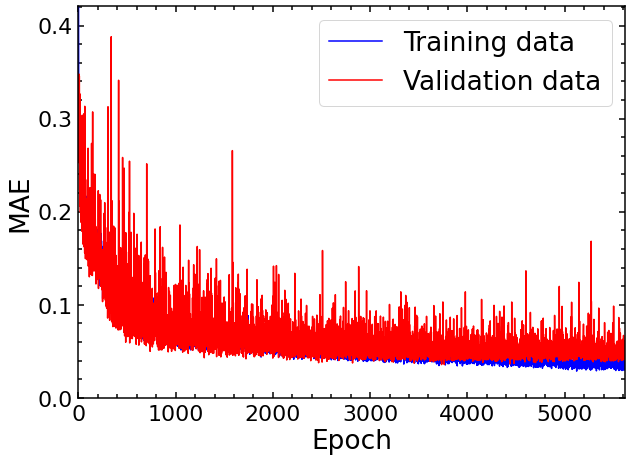

In [8]:
#history.history['loss']

loss_p = np.array(loss)
val_loss_p = np.array(val_loss)
loss_p = loss_p.flatten()
val_loss_p = val_loss_p.flatten()
#print(loss_p)

#print(loss)
#print(val_loss)

plt.figure(figsize=(9.8,7.2))
plt.plot(np.linspace(1,len(loss_p),len(loss_p)),loss_p,'-b',label='Training data')
plt.plot(np.linspace(1,len(loss_p),len(loss_p)),val_loss_p,'-r',label='Validation data')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.xlim(0,len(loss_p))
plt.ylim(0,max(loss_p))
plt.legend()
plt.show()


We evaluate the model on the test data via `evaluate()`:

In [13]:
# we start by unfreezing all layers of the base model
#model.trainable = True

# Freeze all layers except the 10 last layers 
#for layer in base_model.layers[:-10]: 
#    layer.trainable = False

# compile and retrain with a low learning rate
low_lr = 1e-5
model.compile(loss='MAE',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=low_lr), 
              #metrics=['accuracy']
)

history = model.fit(
    x_train_f,
    y_train_f,
    batch_size=1,
    epochs=1,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_eval_f, y_eval_f),
)


200/200 [==============================] - 1s 3ms/step - loss: 0.0193 - val_loss: 0.0368


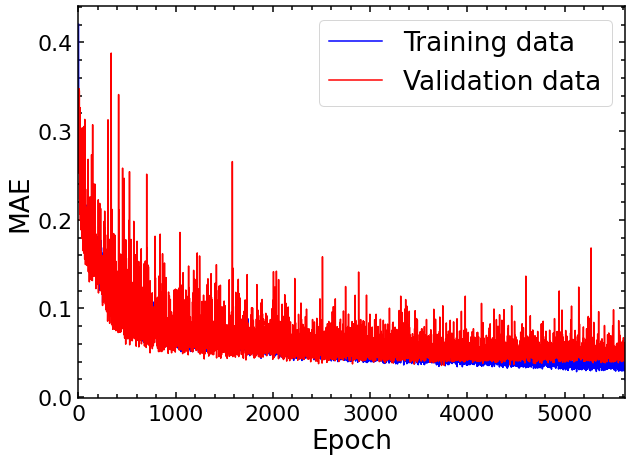

In [14]:
loss_f = np.array(history.history['loss'])
val_loss_f = np.array(history.history['val_loss'])
#print(loss_f)

#plt.figure(figsize=(9.8,7.2))
#plt.plot(np.linspace(1,len(history.history['loss']),len(history.history['loss'])),history.history['loss'],'-b',label='Training data')
#plt.plot(np.linspace(1,len(history.history['val_loss']),len(history.history['val_loss'])),history.history['val_loss'],'-r',label='Validation data')
#plt.xlabel('Epoch')
#plt.ylabel('MAE')
#plt.xlim(0,len(history.history['val_loss']))
#plt.ylim(0,0.2)
#plt.legend()
#plt.show()


loss_t = np.concatenate((loss_p,loss_f))
val_loss_t = np.concatenate((val_loss_p,val_loss_f))
loss_t = loss_t.flatten()
val_loss_t = val_loss_t.flatten()
#print(loss_t)

plt.figure(figsize=(9.8,7.2))
plt.plot(np.linspace(1,len(loss_t),len(loss_t)),loss_t,'-b',label='Training data')
plt.plot(np.linspace(1,len(loss_t),len(loss_t)),val_loss_t,'-r',label='Validation data')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.xlim(0,len(loss_t))
#plt.ylim(0,0.2)
plt.legend()
#plt.show()
plt.savefig('performance_em3.png',facecolor='white', transparent=False)

Now, let's review each piece of this workflow in detail.

In [16]:
outfil = 'performance_em.dat'
tofile = zip(loss_t,val_loss_t)
with open(outfil, 'w') as outf: # written mode (not appended)
    outf.write('# MAE training, MAE validation \n')
    np.savetxt(outf,list(tofile))#,fmt=('%.5f'))
    outf.closed 

# save model
model.save('model_saved')

INFO:tensorflow:Assets written to: model_saved_3/assets


In [ ]:
    if plots[i]=='KLF_z0':
        file = 'KLF_z0_'+sim+'.dat'
        data = np.loadtxt(file)
        bins0,output0 = cut_plot(lbins,ubins,data)
        count = check_cut(0,nmodels,bins0,output0,)
        print(count)
        len_b = np.concatenate([len_b,len(bins0)])
        bins = np.concatenate([bins,bins0])
        output = np.concatenate([output,output0])
    elif plots[i]=='rLF_z0':
        file = 'rLF_z0_'+sim+'.dat'
        data = np.loadtxt(file)
        bins0,output0 = cut_plot(lbins,ubins,data)
        count = check_cut(1,nmodels,bins0,output0,)
        print(count)
        len_b = np.concatenate([len_b,len(bins0)])
        bins = np.concatenate([bins,bins0])
        output = np.concatenate([output,output0])
    elif plots[i]=='earlysize_z0':
        file = 'early-t_z0_'+sim+'.dat'
        data = np.loadtxt(file)
        bins0,output0 = cut_plot(lbins,ubins,data)
        count = check_cut(2,nmodels,bins0,output0,)
        print(count)
        len_b = np.concatenate([len_b,len(bins0)])
        bins = np.concatenate([bins,bins0])
        output = np.concatenate([output,output0]) 
    elif plots[i]=='latesize_z0':
        file = 'late-t_z0_'+sim+'.dat'
        data = np.loadtxt(file)
        bins0,output0 = cut_plot(lbins,ubins,data)
        count = check_cut(3,nmodels,bins0,output0,)
        print(count)
        len_b = np.concatenate([len_b,len(bins0)])
        bins = np.concatenate([bins,bins0])
        output = np.concatenate([output,output0]) 
    elif plots[i]=='HIMF_z0':
        file = 'HIMF_z0_'+sim+'.dat'
        data = np.loadtxt(file)
        bins0,output0 = cut_plot(lbins,ubins,data)
        count = check_cut(4,nmodels,bins0,output0,)
        print(count)
        len_b = np.concatenate([len_b,len(bins0)])
        bins = np.concatenate([bins,bins0])
        output = np.concatenate([output,output0]) 
    elif plots[i]=='earlyfraction_z0':
        file = 'early-f_z0_'+sim+'.dat'
        data = np.loadtxt(file)
        bins0,output0 = cut_plot(lbins,ubins,data)
        count = check_cut(5,nmodels,bins0,output0,)
        print(count)
        len_b = np.concatenate([len_b,len(bins0)])
        bins = np.concatenate([bins,bins0])
        output = np.concatenate([output,output0]) 
    elif plots[i]=='TF_z0':
        file = 'TF_z0_'+sim+'.dat'
        data = np.loadtxt(file)
        bins0,output0 = cut_plot(lbins,ubins,data)
        count = check_cut(6,nmodels,bins0,output0,)
        print(count)
        len_b = np.concatenate([len_b,len(bins0)])
        bins = np.concatenate([bins,bins0])
        output = np.concatenate([output,output0]) 
    elif plots[i]=='bulgeBH_z0':
        file = 'bulge-BH_z0_'+sim+'.dat'
        data = np.loadtxt(file)
        bins0,output0 = cut_plot(lbins,ubins,data)
        count = check_cut(7,nmodels,bins0,output0,)
        print(count)
        len_b = np.concatenate([len_b,len(bins0)])
        bins = np.concatenate([bins,bins0])
        output = np.concatenate([output,output0]) 
    elif plots[i]=='earlymet_z0':
        file = 'Zstars_z0_'+sim+'.dat'
        data = np.loadtxt(file)
        bins0,output0 = cut_plot(lbins,ubins,data)
        count = check_cut(8,nmodels,bins0,output0,)
        print(count)
        len_b = np.concatenate([len_b,len(bins0)])
        bins = np.concatenate([bins,bins0])
        output = np.concatenate([output,output0]) 
    elif plots[i]=='mgasfraction_z0':
        file = 'mgasf_z0_'+sim+'.dat'
        data = np.loadtxt(file)
        bins0,output0 = cut_plot(lbins,ubins,data)
        count = check_cut(9,nmodels,bins0,output0,)
        print(count)
        len_b = np.concatenate([len_b,len(bins0)])
        bins = np.concatenate([bins,bins0])
        output = np.concatenate([output,output0]) 